<a href="https://colab.research.google.com/github/stxnisa/geng-sce2022-ds-project/blob/main/%5BFIN%5D_V3_5_Final_Project_Notebook_Rahma_dan_Amal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
---
# **PREDIKSI POPULARITAS LAGU SUATU ARTIS DI SPOTIFY**
---
---

## **Mengekstrak Data dari Spotify**

Referensi :
1. [Preliminary data analysis on Spotify data using API (Trishala S, Web Mining (IS688, Spring 2021) on Medium](https://medium.com/web-mining-is688-spring-2021/preliminary-data-analysis-on-spotify-data-using-api-a84bb0aae00c)
2. [Spotipy documentation](https://spotipy.readthedocs.io/en/master/#spotipy.client.Spotify.playlist_tracks)
3. [Spotipy: How to read more than 100 tracks from a playlist (Stack Overflow, 2016)](https://stackoverflow.com/questions/39086287/spotipy-how-to-read-more-than-100-tracks-from-a-playlist)

### **1. Mengimpor library**

In [ ]:
pip install spotipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 139 kB 7.9 MB/s 
     |████████████████████████████████| 246 kB 66.7 MB/s 
     |████████████████████████████████| 62 kB 1.5 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials as scc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

### **2. Menghubungkan ke Spotify API dengan variabel environment Client ID dan Client Secret**

In [ ]:
CLIENT_ID = ' ' # ganti dengan client_id masing-masing
CLIENT_SECRET = ' ' # ganti dengan client_secret masing-masing

CLIENT_CREDENTIALS_MANAGER = scc(CLIENT_ID, CLIENT_SECRET)
SP = spotipy.Spotify(client_credentials_manager=CLIENT_CREDENTIALS_MANAGER)

### **3. Mengekstrak data**

#### **3.1. Jika data yang digunakan adalah data album**

##### a. Load dataset album artis terkait

In [ ]:
# Jika menggunakan .csv
# album_dataset = pd.read_csv('/content/album_dataset.csv')
# album_link = album_dataset.album_link
# print(album_link)

In [ ]:
# Jika jumlah album < 5, buat list mandiri
album_link = ['https://open.spotify.com/album/3PU4sh4IH8Yq6pNOFyg3uU?si=yNdkzJA5Q7uFqZkM1hpVQw',
              'https://open.spotify.com/album/53TLN8luTvwC1SBmKrpCPW?si=BfZXWptySai3AMP2xFOJXw',
              'https://open.spotify.com/album/5dRPm82izRq6HNFZjD52Gn?si=BZ8hX42hSe2USWU5PcLVIw',
              'https://open.spotify.com/album/38gVtgLPf4zqgj1pXVQTWZ?si=3ElXvgB_RkqkQIVm7D8m8A']

##### b. Mengambil album ID

In [ ]:
def splitAlbumURI(album_link):
    return album_link.split("/")[-1].split("?")[0]

def getAlbumURI(album_link):
  ids = []
  i = 0
  while i < len(album_link):
    albumURI = splitAlbumURI(album_link[i])
    id = albumURI
    ids.append(id)
    i += 1
  return ids

def getUserID(user_link):
    return user_link.split("/")[-1].split("?")[0]

user_id  = getUserID('https://open.spotify.com/artist/01wau5CL3Z1vfJJWkzBkqg?si=iOehQ74KTpOb4JAcn0nyWg') # ganti dengan link profil artis
album_ids = getAlbumURI(album_link)

##### c. Mengambil lagu-lagu dalam album

In [ ]:
def getTracks(album_id):
    length_list = len(album_id)
    tracks = []

    for i in range(length_list):
      results = SP.album_tracks(album_id[i])
      temp = results['items']

      while results['next']:
          results = SP.next(results)
          temp.extend(results['items'])
      results = temp
      
      for n in range(len(results)):
            track_uri = results[n]["id"]
            track_name = results[n]["name"]

            time.sleep(.5)

            meta = SP.track(track_uri)
            features = SP.audio_features(track_uri)

            # meta data
            name = meta['name']
            album = meta['album']['name']
            artist = meta['album']['artists'][0]['name']
            release_date = meta['album']['release_date']
            length = meta['duration_ms']
            popularity = meta['popularity']

            # features dari data
            acousticness = features[0]['acousticness']
            danceability = features[0]['danceability']
            energy = features[0]['energy']
            instrumentalness = features[0]['instrumentalness']
            liveness = features[0]['liveness']
            loudness = features[0]['loudness']
            valence = features[0]['valence']
            speechiness = features[0]['speechiness']
            tempo = features[0]['tempo']
            time_signature =  features[0]['time_signature']

            track = [name, album, artist, release_date, length, popularity, acousticness, danceability,
                    energy, instrumentalness, liveness, loudness, valence, speechiness, tempo, time_signature]
            tracks.append(track)

    return tracks

album_tracks = getTracks(album_ids)

##### d. Menyimpan dataset yang telah dibentuk

In [ ]:
df = pd.DataFrame(album_tracks, columns = ['title', 'album', 'artist', 'release_date', 'length', 'popularity', 'acousticness', 'danceability',
                  'energy', 'instrumentalness', 'liveness', 'loudness', 'valence', 'speechiness', 'tempo', 'time_signature'])
df.to_csv('Spotify.csv', sep =',')

In [ ]:
df

#### **3.2. Jika data yang digunakan adalah data *multiple playlist, single user***

##### a. Load dataset album artis terkait

In [ ]:
# Jika menggunakan .csv
# playlist_dataset = pd.read_csv('/content/album_dataset.csv')
# playlist_link = album_dataset.album_link
# print(playlist_link)

In [ ]:
# Jika jumlah album < 5, buat list mandiri
playlist_link = ['https://open.spotify.com/user/31t4pxwmezta3hwmxr2kjjqfq72e?si=ad50e597e6714ab6',
                 '']

##### b. Mengambil album ID

In [ ]:
def splitPlaylistURI(playlist_link):
    return playlist_link.split("/")[-1].split("?")[0]

def getPlaylistURI(playlist_link):
  ids = []
  i = 0
  while i < len(playlist_link):
    playlistURI = splitPlaylistURI(playlist_link[i])
    id = playlistURI
    ids.append(id)
    i += 1
  return ids

def getUserID(user_link):
    return user_link.split("/")[-1].split("?")[0]

user_id  = getUserID('https://open.spotify.com/user/31t4pxwmezta3hwmxr2kjjqfq72e?si=40b4cff593504914') # ganti dengan link profil pembuat playlist
playlist_ids = getPlaylistURI(playlist_link)

##### c. Mengambil lagu-lagu dalam album

In [ ]:
def getTracks(user_id, playlist_id):
    length_list = len(playlist_id)
    tracks = []

    for i in range(length_list):
      results = SP.user_playlist_tracks(user_id, playlist_id[i])
      temp = results['items']
      while results['next']:
        results = SP.next(results)
        temp.extend(results['items'])
      results = temp
      
      for n in range(len(results)):
            track_uri = results[i]["track"]["uri"]
            track_name = results[i]["track"]["name"]

            time.sleep(.5)

            meta = SP.track(track_uri)
            features = SP.audio_features(track_uri)

            # meta data
            name = meta['name']
            album = meta['album']['name']
            artist = meta['album']['artists'][0]['name']
            release_date = meta['album']['release_date']
            length = meta['duration_ms']
            popularity = meta['popularity']

            # features dari data
            acousticness = features[0]['acousticness']
            danceability = features[0]['danceability']
            energy = features[0]['energy']
            instrumentalness = features[0]['instrumentalness']
            liveness = features[0]['liveness']
            loudness = features[0]['loudness']
            valence = features[0]['valence']
            speechiness = features[0]['speechiness']
            tempo = features[0]['tempo']
            time_signature =  features[0]['time_signature']

            track = [name, album, artist, release_date, length, popularity, acousticness, danceability,
                    energy, instrumentalness, liveness, loudness, valence, speechiness, tempo, time_signature]
            tracks.append(track)

    return tracks

playlist_tracks = getTracks(user_id, playlist_ids)

##### d. Menyimpan dataset yang telah dibentuk

In [ ]:
df = pd.DataFrame(playlist_tracks, columns = ['title', 'album', 'artist', 'release_date', 'length', 'popularity', 'acousticness', 'danceability',
                  'energy', 'instrumentalness', 'liveness', 'loudness', 'valence', 'speechiness', 'tempo', 'time_signature'])
df.to_csv('Spotify.csv', sep =',')

In [ ]:
df

#### **3.3. Jika data yang digunakan adalah data *multiple playlist, multiple user***

Sedang dalam *maintenance* :)

##### a. Load dataset album artis terkait

In [ ]:
# Jika menggunakan .csv
# playlist_dataset = pd.read_csv('/content/playlist_dataset.csv')
# playlist_link = playlist_dataset.playlist_link
# print(playlist_link)

# Jika jumlah playlist < 5, buat list mandiri
playlist_link = ['https://open.spotify.com/playlist/1yLe6xk0daWTUSs4UuFyJr?si=1e2e83923e5d4d15',
                 'https://open.spotify.com/playlist/2SMI2SW5rvyq3kVFbWJJKp?si=26bc485cf49a4483',
                 'https://open.spotify.com/playlist/7sYkDv0xPB4Fn5EOX1G96Q?si=f9f7597e282c402d',
                 'https://open.spotify.com/playlist/1Ffaxq6lnL25dBvseTgK0H?si=a97f9bf7b66244be',
                 'https://open.spotify.com/playlist/4narzkSW7kieLFcjTWYlzv?si=38a9c5dd1432417b',
                 'https://open.spotify.com/playlist/11wBrQYbaULfjAQOKrCk0A?si=a310730069734766',
                 'https://open.spotify.com/playlist/6FzclParMXUokPur7g8fzN?si=a2d31a542f1b4ba2']

In [ ]:
# Jika menggunakan .csv
# playlist_dataset = pd.read_csv('/content/playlist_dataset.csv')
# user_link = playlist_dataset.user_link
# print(user_link)

# Jika jumlah user < 5, buat list mandiri
user_link = ['https://open.spotify.com/user/3156infjlzqsqujdysgaljhk5lim?si=e85dcbe3c6f54a33',
             'https://open.spotify.com/user/31t4pxwmezta3hwmxr2kjjqfq72e?si=bd13428a82134471',
             'https://open.spotify.com/user/qk35crr8h056fuseljk1tpg98?si=9b7f5e43c6e34c06',
             'https://open.spotify.com/user/1jwk6bec0jc0cgz14b4vng09w?si=c0aee2f5de924f00',
             'https://open.spotify.com/user/y91ayunchssq8jbrfzflie89z?si=b85342822a124af8',
             'https://open.spotify.com/user/6so26yiwgnytd1tzw8u7t47je?si=d3430bd9d1ae4038',
             'https://open.spotify.com/user/cucsobyzjo01mymemdht8d2cp?si=07ace9074b334996']

##### b. Mengambil album ID

In [ ]:
def splitPlaylistURI(playlist_link):
    return playlist_link.split("/")[-1].split("?")[0]

def getPlaylistURI(playlist_link):
  ids = []
  i = 0
  while i < len(playlist_link):
    playlistURI = splitPlaylistURI(playlist_link[i])
    id = playlistURI
    ids.append(id)
    i += 1
  return ids

def splitUserID(user_link):
    return user_link.split("/")[-1].split("?")[0]

def getUserID(playlist_link):
  ids = []
  i = 0
  while i < len(playlist_link):
    userID = splitUserID(user_link[i])
    id = userID
    ids.append(id)
    i += 1
  return ids

user_ids  = getUserID(user_link)
playlist_ids = getPlaylistURI(playlist_link)

##### c. Mengambil lagu-lagu dalam album

In [ ]:
def getTracks(user_id, playlist_id):
    length_list = len(playlist_id)
    tracks = []

    for i in range(length_list):
      results = SP.user_playlist_tracks(user_id[i], playlist_id[i])
      temp = results['items']
      while results['next']:
        results = SP.next(results)
        temp.extend(results['items'])
      results = temp
      
      for n in range(len(results)):
            track_uri = results[i]["track"]["uri"]
            track_name = results[i]["track"]["name"]

            time.sleep(.5)

            meta = SP.track(track_uri)
            features = SP.audio_features(track_uri)

            # meta data
            name = meta['name']
            album = meta['album']['name']
            artist = meta['album']['artists'][0]['name']
            release_date = meta['album']['release_date']
            length = meta['duration_ms']
            popularity = meta['popularity']

            # features dari data
            acousticness = features[0]['acousticness']
            danceability = features[0]['danceability']
            energy = features[0]['energy']
            instrumentalness = features[0]['instrumentalness']
            liveness = features[0]['liveness']
            loudness = features[0]['loudness']
            valence = features[0]['valence']
            speechiness = features[0]['speechiness']
            tempo = features[0]['tempo']
            time_signature =  features[0]['time_signature']

            track = [name, album, artist, release_date, length, popularity, acousticness, danceability,
                    energy, instrumentalness, liveness, loudness, valence, speechiness, tempo, time_signature]
            tracks.append(track)

    return tracks

playlist_tracks = getTracks(user_ids, playlist_ids)

##### d. Menyimpan dataset yang telah dibentuk

In [ ]:
df = pd.DataFrame(playlist_tracks, columns = ['title', 'album', 'artist', 'release_date', 'length', 'popularity', 'acousticness', 'danceability',
                  'energy', 'instrumentalness', 'liveness', 'loudness', 'valence', 'speechiness', 'tempo', 'time_signature'])
df.to_csv('Spotify.csv', sep =',')

In [ ]:
df

#### **3.4. Jika data yang digunakan adalah playlist tunggal dengan >100 lagu**

In [ ]:
def getPlaylistURI(playlist_link):
    return playlist_link.split("/")[-1].split("?")[0]

def getUserID(user_link):
    return user_link.split("/")[-1].split("?")[0]

def getTracks(user_id, playlist_id):
    results = SP.user_playlist_tracks(user_id,playlist_id)
    temp = results['items']
    while results['next']:
        results = SP.next(results)
        temp.extend(results['items'])
    results = temp    

    tracks = []
    
    for i in range(len(results)):
      track_uri = results[i]["track"]["uri"]
      track_name = results[i]["track"]["name"]

      time.sleep(.5)

      meta = SP.track(track_uri)
      features = SP.audio_features(track_uri)

      # meta data
      name = meta['name']
      album = meta['album']['name']
      artist = meta['album']['artists'][0]['name']
      release_date = meta['album']['release_date']
      length = meta['duration_ms']
      popularity = meta['popularity']

      # features dari data
      acousticness = features[0]['acousticness']
      danceability = features[0]['danceability']
      energy = features[0]['energy']
      instrumentalness = features[0]['instrumentalness']
      liveness = features[0]['liveness']
      loudness = features[0]['loudness']
      valence = features[0]['valence']
      mode = features[0]['mode']
      key = features[0]['key']
      speechiness = features[0]['speechiness']
      tempo = features[0]['tempo']
      time_signature =  features[0]['time_signature']

      track = [name, album, artist, release_date, length, popularity, acousticness, danceability,
               energy, instrumentalness, liveness, loudness, valence, mode, key, speechiness, tempo, time_signature]
      tracks.append(track)
    
    return tracks

user_id  = getUserID('https://open.spotify.com/user/21lehhxpebwx2xqzu6wfxjxhy?si=9aa62c3018954a79')
playlist_id = getPlaylistURI('https://open.spotify.com/playlist/0EihGcmvH4s7RLr4POl7YM?si=c70d93273d0d4943')
playlist_tracks = getTracks(user_id, playlist_id)

In [ ]:
df = pd.DataFrame(playlist_tracks, columns = ['title', 'album', 'artist', 'release_date', 'length', 'popularity', 'acousticness', 'danceability',
                  'energy', 'instrumentalness', 'liveness', 'loudness', 'valence', 'mode', 'key', 'speechiness', 'tempo', 'time_signature'])
df.to_csv('Spotify_AKB48.csv', sep =',')
features_df = df.drop(columns=['title', 'album', 'artist', 'release_date'])

In [ ]:
df

,title,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,valence,mode,key,speechiness,tempo,time_signature
0,元カレです,元カレです Special Edition,AKB48,2022-05-18,228600,31,0.4390,0.698,0.956,0.000000,0.0975,-1.832,0.805,1,5,0.0686,120.019,4
1,壊さなきゃいけないもの,元カレです Special Edition,AKB48,2022-05-18,298960,27,0.0788,0.320,0.868,0.000000,0.3400,-1.772,0.486,1,5,0.0457,163.870,4
2,臆病なナマケモノ,元カレです Special Edition,AKB48,2022-05-18,285186,21,0.0337,0.464,0.874,0.000000,0.3280,-1.553,0.378,1,10,0.0439,82.013,4
3,Loss of time,元カレです Special Edition,AKB48,2022-05-18,224746,21,0.0355,0.452,0.933,0.000000,0.2680,-2.105,0.587,1,9,0.0867,171.946,4
4,ヤラカソウ,元カレです Special Edition,AKB48,2022-05-18,276813,17,0.0542,0.617,0.956,0.000000,0.3350,-1.924,0.732,1,11,0.1280,148.010,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,根も葉もRumor,根も葉もRumor Special Edition,AKB48,2021-09-29,259173,28,0.0758,0.657,0.946,0.000000,0.1120,-2.187,0.797,0,5,0.0956,135.037,4
678,大騒ぎ天国(Second Generation),根も葉もRumor Special Edition,AKB48,2021-09-29,197200,16,0.1410,0.559,0.972,0.000000,0.3250,-1.652,0.886,1,8,0.0885,165.142,4
679,西高東低(Team 8),根も葉もRumor Special Edition,AKB48,2021-09-29,258545,15,0.0991,0.463,0.933,0.000001,0.3210,-2.300,0.508,1,0,0.0879,159.932,4
680,君がいなくなる12月(横山由依),根も葉もRumor Special Edition,AKB48,2021-09-29,350653,17,0.7120,0.496,0.537,0.000139,0.2730,-4.474,0.266,1,11,0.0274,78.025,4


#### **3.5. Jika ingin menggunakan dataset unggahan/yang tersimpan di Drive**

In [ ]:
# kita akan mengakses data yang terdapat pada google drive, sehingga aksesnya perlu dibuat terlebih dahulu
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

In [ ]:
df = pd.read_csv('/content/Spotify_AKB48.csv')

In [ ]:
df

## ***Exploratory data analysis* (EDA) dan *Feature Engineering***

Referensi :
1. [Preliminary data analysis on Spotify data using API (Trishala S, Web Mining (IS688, Spring 2021) on Medium](https://medium.com/web-mining-is688-spring-2021/preliminary-data-analysis-on-spotify-data-using-api-a84bb0aae00c)
2. Hands-on materials from Summer Club Explorer 2022 - Data Science, Generation Girl

### **1. Data overview**

#### a. Data overview

In [ ]:
df.head()

,title,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,valence,mode,key,speechiness,tempo,time_signature
0,元カレです,元カレです Special Edition,AKB48,2022-05-18,228600,31,0.4390,0.698,0.956,0.0,0.0975,-1.832,0.805,1,5,0.0686,120.019,4
1,壊さなきゃいけないもの,元カレです Special Edition,AKB48,2022-05-18,298960,27,0.0788,0.320,0.868,0.0,0.3400,-1.772,0.486,1,5,0.0457,163.870,4
2,臆病なナマケモノ,元カレです Special Edition,AKB48,2022-05-18,285186,21,0.0337,0.464,0.874,0.0,0.3280,-1.553,0.378,1,10,0.0439,82.013,4
3,Loss of time,元カレです Special Edition,AKB48,2022-05-18,224746,21,0.0355,0.452,0.933,0.0,0.2680,-2.105,0.587,1,9,0.0867,171.946,4
4,ヤラカソウ,元カレです Special Edition,AKB48,2022-05-18,276813,17,0.0542,0.617,0.956,0.0,0.3350,-1.924,0.732,1,11,0.1280,148.010,4


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             682 non-null    object 
 1   album             682 non-null    object 
 2   artist            682 non-null    object 
 3   release_date      682 non-null    object 
 4   length            682 non-null    int64  
 5   popularity        682 non-null    int64  
 6   acousticness      682 non-null    float64
 7   danceability      682 non-null    float64
 8   energy            682 non-null    float64
 9   instrumentalness  682 non-null    float64
 10  liveness          682 non-null    float64
 11  loudness          682 non-null    float64
 12  valence           682 non-null    float64
 13  mode              682 non-null    int64  
 14  key               682 non-null    int64  
 15  speechiness       682 non-null    float64
 16  tempo             682 non-null    float64
 1

#### b. Mengecek dan menghapus duplikat data

In [ ]:
df.duplicated().sum()

0

In [ ]:
(~df.duplicated()).sum()

682

In [ ]:
# df = df.drop_duplicates()
# df

#### c. Mengecek dan menghapus *missing values*

In [ ]:
print(df.isnull().values.sum())

0


### **2. *Exploratory Data Analysis* (EDA)**

In [ ]:
df.describe()

,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,valence,mode,key,speechiness,tempo,time_signature
count,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000
mean,262164.802053,10.967742,0.213757,0.528073,0.872893,0.003156,0.235288,-3.780770,0.620642,0.665689,5.067449,0.061302,134.098440,3.964809
std,35379.404679,7.512622,0.214225,0.093336,0.133876,0.022256,0.121446,1.546732,0.183702,0.472095,3.406588,0.035805,26.832736,0.227207
min,59480.000000,0.000000,0.000039,0.234000,0.169000,0.000000,0.017800,-11.559000,0.070100,0.000000,0.000000,0.023500,66.799000,1.000000
25%,238965.500000,6.000000,0.033275,0.464250,0.858000,0.000000,0.125000,-4.430500,0.498250,0.000000,2.000000,0.036500,118.178000,4.000000
50%,259400.000000,9.000000,0.144000,0.530000,0.918000,0.000000,0.240500,-3.492500,0.637000,1.000000,5.000000,0.050650,134.996500,4.000000
75%,284653.000000,14.000000,0.352750,0.595000,0.955000,0.000029,0.330750,-2.775000,0.756750,1.000000,8.000000,0.074625,154.027750,4.000000
max,404653.000000,46.000000,0.977000,0.846000,0.998000,0.365000,0.815000,-0.495000,0.970000,1.000000,11.000000,0.288000,206.125000,4.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fce78b45510>,
      dtype=object)

<Figure size 36000x28800 with 0 Axes>

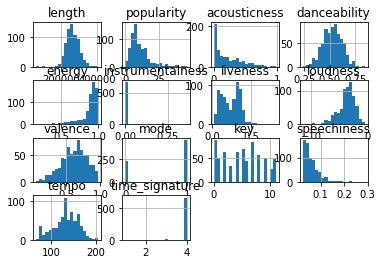

In [ ]:
plt.figure(figsize=(500,400)) # TANYAAAA!!
df.hist(column = ['length', 'popularity', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness',
                  'loudness', 'valence', 'mode', 'key', 'speechiness', 'tempo', 'time_signature'],
        bins=20)

In [ ]:
sorted_df = df.sort_values('popularity', ascending = False)
sorted_df.head()

,title,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,valence,mode,key,speechiness,tempo,time_signature
674,"Sugar Rush - From ""Wreck-It Ralph""/Soundtrack ...",Wreck-It Ralph,Various Artists,2012-01-01,194826,46,0.000039,0.588,0.867,0.000027,0.0457,-3.533,0.790,0,11,0.0331,132.026,4
121,恋するフォーチュンクッキー,恋するフォーチュンクッキー <Type-A> 通常盤,AKB48,2013-08-21,284226,44,0.242000,0.685,0.885,0.000000,0.3230,-5.677,0.951,1,2,0.0395,122.010,4
51,フライングゲット,フライングゲット<通常盤Type-A>,AKB48,2011-08-24,253280,42,0.056500,0.515,0.948,0.000003,0.3700,-5.821,0.620,0,0,0.1210,131.055,4
6,大声ダイヤモンド,大声ダイヤモンド,AKB48,2008-10-22,246480,42,0.436000,0.418,0.958,0.000000,0.1540,-5.320,0.690,1,2,0.0615,174.119,4
23,ポニーテールとシュシュ,ポニーテールとシュシュ<Type-A>,AKB48,2010-05-26,269546,39,0.018700,0.416,0.923,0.000148,0.1360,-7.419,0.610,1,6,0.0787,160.028,4


In [ ]:
sorted_df = df.sort_values('tempo', ascending = False)
sorted_df.head()

,title,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,valence,mode,key,speechiness,tempo,time_signature
407,ボーイフレンドの作り方(TeamK),AKB48 Team K 4th stage 「最終ベルが鳴る」 ~studio rec...,AKB48,2013-01-01,260693,9,0.0854,0.425,0.905,0.000000,0.3340,-3.805,0.770,1,10,0.0657,206.125,4
369,ロックだよ、人生は...(ひまわり組),AKB48 ひまわり組 2nd stage 「夢を死なせるわけにいかない」 ~studio ...,AKB48,2013-01-01,249426,3,0.0177,0.428,0.892,0.000002,0.0798,-4.023,0.419,1,0,0.0977,199.966,4
636,雨の動物園(チームK Ver.),Team K 2nd stage 「青春ガールズ」 〜studio recordings コ...,AKB48,2013-01-09,278200,6,0.1760,0.420,0.891,0.000463,0.1340,-3.611,0.904,1,2,0.0372,199.832,4
434,潮風の招待状(TeamB),AKB48 Team B 5th stage 「シアターの女神」 ~studio recor...,AKB48,2013-01-01,239653,7,0.5670,0.410,0.642,0.000000,0.3690,-5.328,0.514,1,2,0.0390,199.802,4
614,恋のPLAN(チームA Ver.),Team A 2nd stage 「会いたかった」 〜studio recordings コ...,AKB48,2013-01-09,249813,7,0.2590,0.393,0.886,0.000054,0.3300,-3.169,0.808,1,7,0.1200,199.769,4


In [ ]:
sorted_df = df.sort_values('valence', ascending = False)
sorted_df.head()

,title,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,valence,mode,key,speechiness,tempo,time_signature
666,ダルイカンジ,Team A 4th stage 「ただいま恋愛中」 〜studio recordings ...,AKB48,2013-01-09,234400,9,0.0268,0.744,0.937,0.000408,0.0371,-3.304,0.970,0,9,0.0508,131.981,4
413,16人姉妹の歌(TeamK),AKB48 Team K 4th stage 「最終ベルが鳴る」 ~studio rec...,AKB48,2013-01-01,223560,7,0.4990,0.660,0.846,0.000000,0.3980,-2.849,0.968,1,2,0.1700,134.850,4
366,青春の稲妻(ひまわり組),AKB48 ひまわり組 2nd stage 「夢を死なせるわけにいかない」 ~studio ...,AKB48,2013-01-01,284026,3,0.3690,0.687,0.912,0.000006,0.0696,-4.682,0.964,0,3,0.0447,110.052,4
94,素敵な三角関係(チームサプライズ),素敵な三角関係(チームサプライズ),AKB48,2012-11-07,264093,9,0.7360,0.540,0.793,0.000000,0.2970,-1.571,0.963,0,7,0.0280,188.062,4
353,ぐ~ぐ~おなか(岩佐美咲、前田敦子、前田亜美、仁藤萌乃、藤江れいな、石田晴香、小森美果、...,1830m,AKB48,2012-08-15,243226,8,0.1620,0.751,0.597,0.000000,0.2060,-5.934,0.961,1,2,0.0275,105.004,4


In [ ]:
sorted_df = df.sort_values('danceability', ascending = False)
sorted_df.head()

,title,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,valence,mode,key,speechiness,tempo,time_signature
38,胡桃とダイアローグ(歌:team A),チャンスの順番<Type-A>,AKB48,2010-12-08,197866,21,0.05600,0.846,0.725,0.000214,0.3080,-8.137,0.954,0,8,0.1340,136.030,4
178,履物と傘の物語,Green Flash 劇場盤,AKB48,2015-03-04,284480,3,0.91100,0.757,0.169,0.000000,0.0895,-9.569,0.378,1,1,0.0288,89.760,3
22,マジジョテッペンブルース,マジジョテッペンブルース,AKB48,2010-05-26,226173,25,0.00765,0.751,0.599,0.000021,0.3040,-8.572,0.910,0,11,0.0583,131.991,4
353,ぐ~ぐ~おなか(岩佐美咲、前田敦子、前田亜美、仁藤萌乃、藤江れいな、石田晴香、小森美果、...,1830m,AKB48,2012-08-15,243226,8,0.16200,0.751,0.597,0.000000,0.2060,-5.934,0.961,1,2,0.0275,105.004,4
182,履物と傘の物語,Green Flash Type N【初回限定盤】,AKB48,2015-03-04,284480,5,0.91200,0.747,0.169,0.000000,0.0916,-9.562,0.373,1,1,0.0291,89.762,3


In [ ]:
sorted_df = df.sort_values('energy', ascending = False)
sorted_df.head()

,title,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,valence,mode,key,speechiness,tempo,time_signature
431,100メートルコンビニ(TeamB),AKB48 Team B 5th stage 「シアターの女神」 ~studio recor...,AKB48,2013-01-01,234333,10,0.1220,0.582,0.998,0.000021,0.508,-3.177,0.835,0,5,0.0736,146.015,4
447,女子高生はやめられない(TeamB),AKB48 Team B 4th stage 「アイドルの夜明け」 ~studio rec...,AKB48,2013-01-01,264133,6,0.1070,0.596,0.997,0.000725,0.262,-3.612,0.765,1,0,0.0481,136.039,4
74,君のために僕は…,君のために僕は…,AKB48,2012-05-23,302360,6,0.1330,0.461,0.996,0.028500,0.503,-5.661,0.169,0,2,0.1210,136.003,4
564,ミュージックジャンキー(Team B),0と1の間【Million Singles】,AKB48,2015-11-18,229280,3,0.0624,0.502,0.996,0.000000,0.336,-2.840,0.248,0,9,0.1580,149.945,4
598,誕生日の夜(チームA Ver.),Team A 3rd stage 「誰かのために」 〜studio recordings コ...,AKB48,2013-01-09,293906,5,0.0124,0.617,0.996,0.000656,0.186,-2.859,0.390,0,11,0.1610,128.033,4


In [ ]:
sorted_df = df.sort_values('length', ascending = False)
sorted_df.head()

,title,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,valence,mode,key,speechiness,tempo,time_signature
343,思い出のほとんど(高橋みなみ、前田敦子),1830m,AKB48,2012-08-15,404653,22,0.7910,0.506,0.407,0.000000,0.128,-6.303,0.136,1,8,0.0258,145.797,4
193,出逢いの日、別れの日(ゲンソー&ジキソー),僕たちは戦わない【劇場盤】,AKB48,2015-05-20,387213,6,0.6030,0.602,0.842,0.000000,0.140,-3.251,0.493,1,0,0.0263,99.015,4
107,So long !,So long !<TYPE-A>初回限定盤,AKB48,2013-02-20,364426,18,0.6060,0.437,0.730,0.000003,0.157,-2.917,0.563,1,10,0.0309,184.121,4
487,長い光(TeamA),AKB48 Team A 5th stage 「恋愛禁止条例」 ~studio record...,AKB48,2013-01-01,362546,13,0.0481,0.537,0.911,0.000001,0.146,-3.646,0.382,0,5,0.0683,139.915,4
556,7回目の「レミゼ」(小嶋陽菜),ここがロドスだ、ここで跳べ!<Type A>【初回限定盤】,AKB48,2015-01-21,361639,4,0.7030,0.623,0.886,0.000000,0.316,-3.100,0.790,1,0,0.0330,106.021,4


### **3. *Feature Engineering***

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


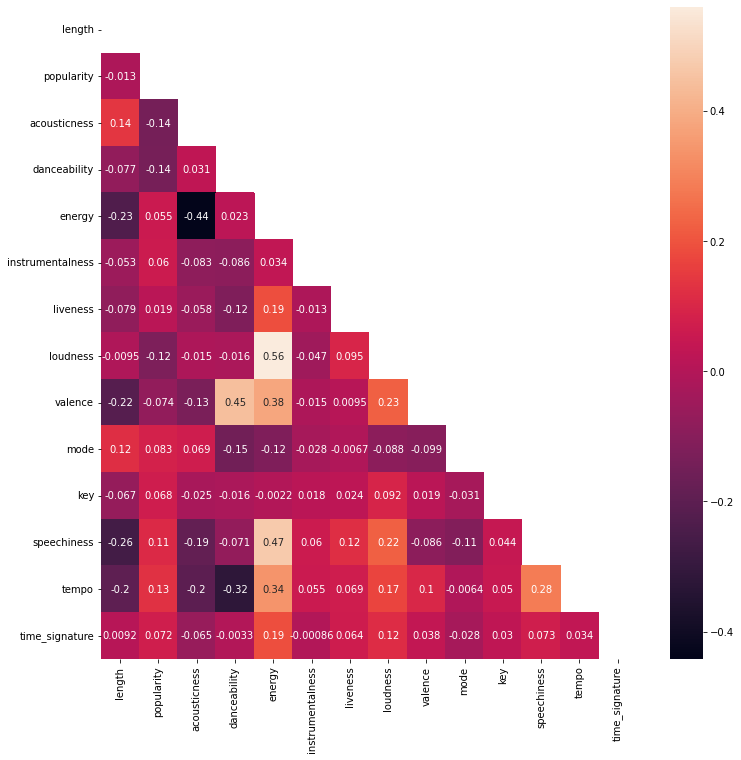

In [ ]:
# hanya memilih nilai korelasi di "upper triangle" -- menghindari duplikasi nilai
mask = np.triu(np.ones_like(df.drop(columns=['title', 'album', 'artist', 'release_date']).corr(), dtype=np.bool)) # TANYA!!!

# buat heatmap
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True, mask=mask)

Text(0.5, 1.0, 'Loudness and Energy')

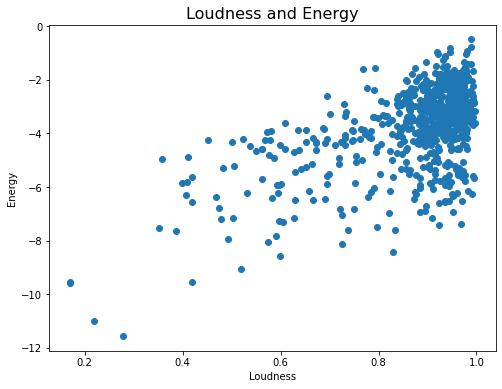

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['energy'], df['loudness'])
plt.xlabel("Loudness")
plt.ylabel("Energy")
plt.title("Loudness and Energy", size=16)

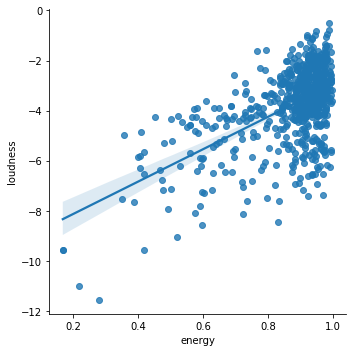

In [ ]:
sns.lmplot(x='energy',y='loudness', data = df)

Text(0.5, 1.0, 'Valence and Danceability')

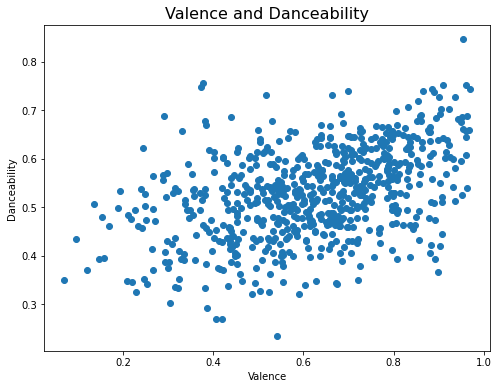

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['valence'], df['danceability'])
plt.xlabel("Valence")
plt.ylabel("Danceability")
plt.title("Valence and Danceability", size=16)

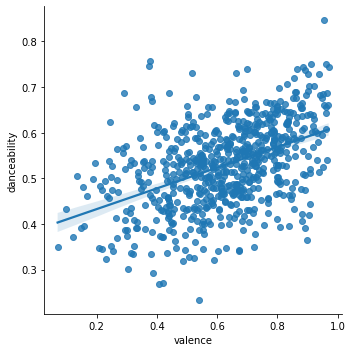

In [ ]:
sns.lmplot(x='valence',y='danceability', data = df)

Text(0.5, 1.0, 'Speechiness and Energy')

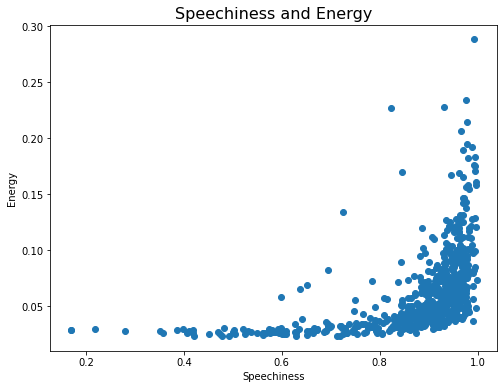

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['energy'], df['speechiness'])
plt.xlabel("Speechiness")
plt.ylabel("Energy")
plt.title("Speechiness and Energy", size=16)

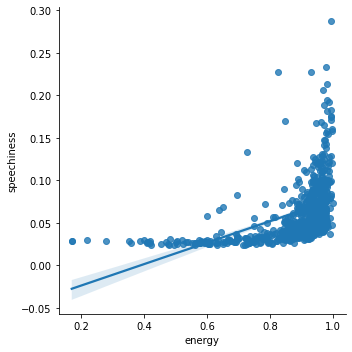

In [ ]:
sns.lmplot(x='energy',y='speechiness', data = df)

## ***Model Building* dan *Model Evaluation***

### **Mengimport library yang diperlukan dan memilih variabel yang akan dianalisis**

In [ ]:
# import libraries yang dibutuhkan
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
features_df = df.drop(columns=['title', 'album', 'artist', 'release_date', 'time_signature'])

### **Model 1**: All-In-One

1. **Independent variables (X) :** 'length', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'valence', 'mode', 'key', 'speechiness', 'tempo'
2. **Dependent variable (Y) :** 'popularity'

#### a. Model Building

In [ ]:
# memilih kolom untuk digunakan sebagai fitur model -- menghilangkan target variabel dan kolom tidak penting lainnya
x = features_df.drop(columns=['popularity'])
# memilih kolom untuk digunakan sebagai variabel target
y = features_df['popularity']

# membagi data ke training dan testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

print("X_train : ", x_train.shape)
print("X_test : ", x_test.shape)
print("Y_train : ", y_train.shape)
print("Y_test : ", y_test.shape)

X_train :  (545, 12)
X_test :  (137, 12)
Y_train :  (545,)
Y_test :  (137,)


In [ ]:
# membuat model linear regression
linear_regression_model = LinearRegression()
# "training" model dengan dataset yang sesuai
linear_regression_model.fit(x_train,y_train)

LinearRegression()

In [ ]:
# mengambil koefisien yang didapatkan dari model
linear_regression_model.coef_

array([ 1.43035686e-05, -3.97498062e+00, -3.31772351e+00,  6.29121911e+00,
        7.35690515e+00, -1.62319142e+00, -1.07389716e+00, -2.21692981e+00,
        1.10024528e+00,  1.67011339e-01,  1.90633267e+01,  1.66656829e-02])

In [ ]:
# menampilkan hasil linear regression (koefisien dari model)
coeff_df = pd.DataFrame(linear_regression_model.coef_, x.columns, columns = ["Coefficient"])
coeff_df

,Coefficient
length,0.000014
acousticness,-3.974981
danceability,-3.317724
energy,6.291219
instrumentalness,7.356905
liveness,-1.623191
loudness,-1.073897
valence,-2.216930
mode,1.100245
key,0.167011


In [ ]:
# mengambil bias dari model
linear_regression_model.intercept_

-2.7927482593299366

#### b. Model Evaluation

In [ ]:
# menggunakan model untuk memprediksi nilai matematika menggunakan testing dataset
predictions = linear_regression_model.predict(x_test)

In [ ]:
df_test_set = x_test
df_test_set = df_test_set.join(y_test)
df_test_set['PREDICTED SCORE'] = predictions
df_test_set.head(5)

,length,acousticness,danceability,energy,instrumentalness,liveness,loudness,valence,mode,key,speechiness,tempo,popularity,PREDICTED SCORE
645,291386,0.00655,0.565,0.827,0.000002,0.261,-3.485,0.632,1,2,0.0321,120.005,6,10.641359
347,242386,0.03210,0.533,0.987,0.000007,0.321,-2.407,0.717,1,8,0.1110,170.004,19,12.847664
211,335906,0.43300,0.513,0.974,0.000000,0.374,-2.249,0.647,1,9,0.0436,89.990,5,10.024416
54,253040,0.00339,0.478,0.796,0.000000,0.226,-7.481,0.597,1,1,0.0303,157.085,19,15.041371
371,250906,0.11300,0.459,0.923,0.000000,0.280,-3.607,0.700,0,2,0.0426,148.016,3,10.111001


Text(0, 0.5, 'Predicted')

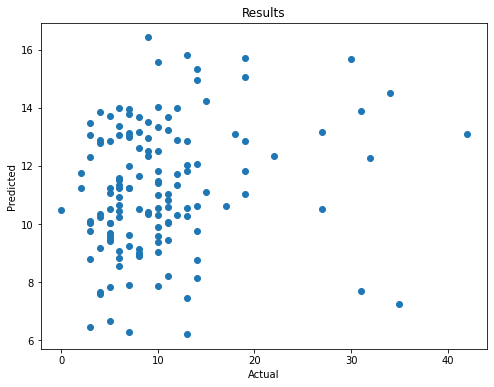

In [ ]:
# membandingkan hasil prediksi dan nilai asli
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions)
plt.title("Results")
plt.xlabel("Actual")
plt.ylabel("Predicted")

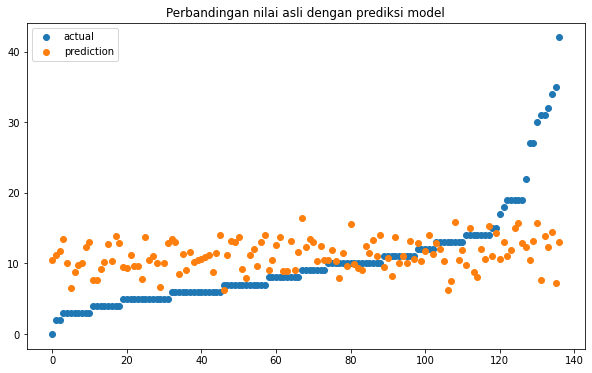

In [ ]:
import numpy as np
plt.figure(figsize=(10, 6))

# mengurutkan nilai asli dari terkecil hingga tertinggi
y_sorted = np.sort(y_test.tolist())
y_sorted_index = np.argsort(y_test.tolist())

# merubah urutan prediction score berdasarkan urutan y_sorted 
predictions_sorted = predictions[y_sorted_index]

# plot kedua score
plt.scatter(np.arange(0,len(y_sorted)), y_sorted, label='actual')
plt.scatter(np.arange(0,len(y_sorted)), predictions_sorted, label='prediction')
plt.title("Perbandingan nilai asli dengan prediksi model")
plt.legend()

In [ ]:
# mengevaluasi model dengan 3 metrik berbeda
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 5.163162829643102
MSE: 51.03567931485154
RMSE: 7.14392604348978


### **Model 2**: Let's Dance and Sing Along

1. **Independent variables (X) :** 'danceability', 'energy', 'loudness', 'valence', 'speechiness', 'tempo'
2. **Dependent variable (Y) :** 'popularity'

#### a. Model Building

In [ ]:
# memilih kolom untuk digunakan sebagai fitur model -- menghilangkan target variabel dan kolom tidak penting lainnya
x = features_df.drop(columns=['popularity', 'length', 'acousticness', 'instrumentalness', 'liveness', 'mode', 'key'])
# memilih kolom untuk digunakan sebagai variabel target
y = features_df['popularity']

# membagi data ke training dan testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

print("X_train : ", x_train.shape)
print("X_test : ", x_test.shape)
print("Y_train : ", y_train.shape)
print("Y_test : ", y_test.shape)

X_train :  (545, 6)
X_test :  (137, 6)
Y_train :  (545,)
Y_test :  (137,)


In [ ]:
# membuat model linear regression
linear_regression_model = LinearRegression()
# "training" model dengan dataset yang sesuai
linear_regression_model.fit(x_train,y_train)

LinearRegression()

In [ ]:
# mengambil koefisien yang didapatkan dari model
linear_regression_model.coef_

array([-7.85419611,  9.0529615 , -1.26931363, -2.44469667,  6.23527819,
        0.01733803])

In [ ]:
# menampilkan hasil linear regression (koefisien dari model)
coeff_df = pd.DataFrame(linear_regression_model.coef_, x.columns, columns = ["Coefficient"])
coeff_df

,Coefficient
danceability,-7.854196
energy,9.052962
loudness,-1.269314
valence,-2.444697
speechiness,6.235278
tempo,0.017338


In [ ]:
# mengambil bias dari model
linear_regression_model.intercept_

1.2600592245545421

#### b. Model Evaluation

In [ ]:
# menggunakan model untuk memprediksi nilai matematika menggunakan testing dataset
predictions = linear_regression_model.predict(x_test)

In [ ]:
df_test_set = x_test
df_test_set = df_test_set.join(y_test)
df_test_set['PREDICTED SCORE'] = predictions
df_test_set.head(5)

,danceability,energy,loudness,valence,speechiness,tempo,popularity,PREDICTED SCORE
317,0.731,0.890,-2.374,0.517,0.0510,126.970,13,7.844628
460,0.588,0.903,-4.000,0.879,0.0440,117.034,10,10.048473
144,0.624,0.474,-6.772,0.519,0.0250,103.767,4,9.932136
603,0.567,0.970,-2.909,0.790,0.0733,143.011,7,10.285800
115,0.665,0.779,-6.371,0.880,0.0337,141.023,5,11.679929


Text(0, 0.5, 'Predicted')

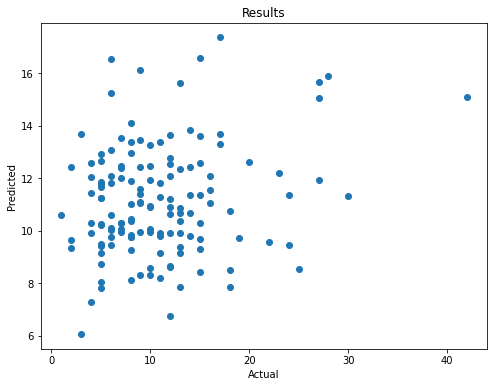

In [ ]:
# membandingkan hasil prediksi dan nilai asli
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions)
plt.title("Results")
plt.xlabel("Actual")
plt.ylabel("Predicted")

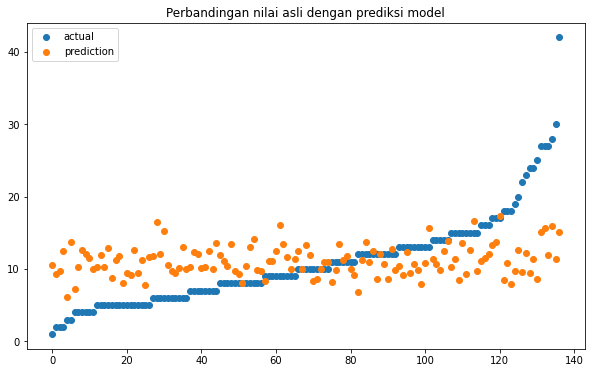

In [ ]:
import numpy as np
plt.figure(figsize=(10, 6))

# mengurutkan nilai asli dari terkecil hingga tertinggi
y_sorted = np.sort(y_test.tolist())
y_sorted_index = np.argsort(y_test.tolist())

# merubah urutan prediction score berdasarkan urutan y_sorted 
predictions_sorted = predictions[y_sorted_index]

# plot kedua score
plt.scatter(np.arange(0,len(y_sorted)), y_sorted, label='actual')
plt.scatter(np.arange(0,len(y_sorted)), predictions_sorted, label='prediction')
plt.title("Perbandingan nilai asli dengan prediksi model")
plt.legend()

In [ ]:
# mengevaluasi model dengan 3 metrik berbeda
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 4.84863031257623
MSE: 40.075611856682336
RMSE: 6.330530140255422


### **Model 3**: Karaoke Mode

1. **Independent variables (X) :** 'danceability', 'loudness', 'valence', 'speechiness', 'tempo'
2. **Dependent variable (Y) :** 'popularity'

#### a. Model Building

In [ ]:
# memilih kolom untuk digunakan sebagai fitur model -- menghilangkan target variabel dan kolom tidak penting lainnya
x = features_df.drop(columns=['popularity', 'length', 'acousticness', 'instrumentalness', 'liveness', 'mode', 'key', 'energy'])
# memilih kolom untuk digunakan sebagai variabel target
y = features_df['popularity']

# membagi data ke training dan testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

print("X_train : ", x_train.shape)
print("X_test : ", x_test.shape)
print("Y_train : ", y_train.shape)
print("Y_test : ", y_test.shape)

X_train :  (545, 5)
X_test :  (137, 5)
Y_train :  (545,)
Y_test :  (137,)


In [ ]:
# membuat model linear regression
linear_regression_model = LinearRegression()
# "training" model dengan dataset yang sesuai
linear_regression_model.fit(x_train,y_train)

LinearRegression()

In [ ]:
# mengambil koefisien yang didapatkan dari model
linear_regression_model.coef_

array([-6.682794  , -0.78362358, -1.23480523, 23.14452511,  0.03081435])

In [ ]:
# menampilkan hasil linear regression (koefisien dari model)
coeff_df = pd.DataFrame(linear_regression_model.coef_, x.columns, columns = ["Coefficient"])
coeff_df

,Coefficient
danceability,-6.682794
loudness,-0.783624
valence,-1.234805
speechiness,23.144525
tempo,0.030814


In [ ]:
# mengambil bias dari model
linear_regression_model.intercept_

6.916898796850765

#### b. Model Evaluation

In [ ]:
# menggunakan model untuk memprediksi nilai matematika menggunakan testing dataset
predictions = linear_regression_model.predict(x_test)

In [ ]:
df_test_set = x_test
df_test_set = df_test_set.join(y_test)
df_test_set['PREDICTED SCORE'] = predictions
df_test_set.head(5)

,danceability,loudness,valence,speechiness,tempo,popularity,PREDICTED SCORE
530,0.600,-4.116,0.779,0.0930,132.037,6,11.391778
628,0.546,-2.015,0.440,0.0335,100.031,6,8.161512
334,0.737,-6.452,0.890,0.0364,98.008,15,9.811155
435,0.387,-3.436,0.553,0.0864,175.065,17,13.734541
260,0.528,-5.834,0.250,0.0299,133.772,7,12.465460


Text(0, 0.5, 'Predicted')

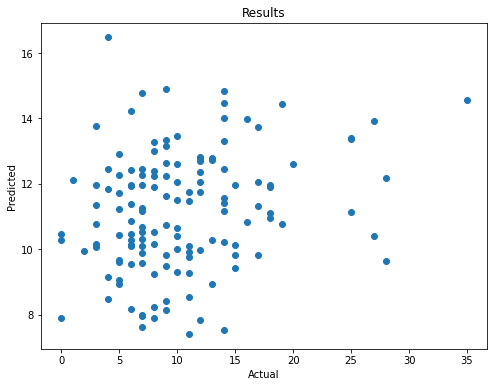

In [ ]:
# membandingkan hasil prediksi dan nilai asli
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions)
plt.title("Results")
plt.xlabel("Actual")
plt.ylabel("Predicted")

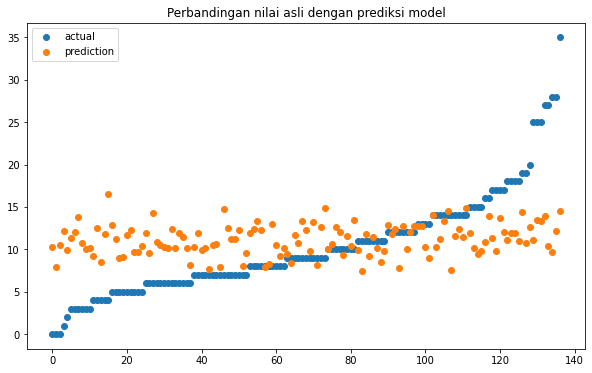

In [ ]:
import numpy as np
plt.figure(figsize=(10, 6))

# mengurutkan nilai asli dari terkecil hingga tertinggi
y_sorted = np.sort(y_test.tolist())
y_sorted_index = np.argsort(y_test.tolist())

# merubah urutan prediction score berdasarkan urutan y_sorted 
predictions_sorted = predictions[y_sorted_index]

# plot kedua score
plt.scatter(np.arange(0,len(y_sorted)), y_sorted, label='actual')
plt.scatter(np.arange(0,len(y_sorted)), predictions_sorted, label='prediction')
plt.title("Perbandingan nilai asli dengan prediksi model")
plt.legend()

In [ ]:
# mengevaluasi model dengan 3 metrik berbeda
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 4.657053092539883
MSE: 36.38957383762758
RMSE: 6.03237712992379


### **Model 4**: Let's Dance

1. **Independent variables (X) :** 'danceability', 'energy', 'loudness', 'valence', 'tempo'
2. **Dependent variable (Y) :** 'popularity'

#### a. Model Building

In [ ]:
# memilih kolom untuk digunakan sebagai fitur model -- menghilangkan target variabel dan kolom tidak penting lainnya
x = features_df.drop(columns=['popularity', 'length', 'acousticness', 'instrumentalness', 'liveness', 'mode', 'speechiness', 'key'])
# memilih kolom untuk digunakan sebagai variabel target
y = features_df['popularity']

# membagi data ke training dan testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

print("X_train : ", x_train.shape)
print("X_test : ", x_test.shape)
print("Y_train : ", y_train.shape)
print("Y_test : ", y_test.shape)

X_train :  (545, 5)
X_test :  (137, 5)
Y_train :  (545,)
Y_test :  (137,)


In [ ]:
# membuat model linear regression
linear_regression_model = LinearRegression()
# "training" model dengan dataset yang sesuai
linear_regression_model.fit(x_train,y_train)

LinearRegression()

In [ ]:
# mengambil koefisien yang didapatkan dari model
linear_regression_model.coef_

array([-6.99752207,  9.98493347, -1.03783006, -3.65926716,  0.02677711])

In [ ]:
# menampilkan hasil linear regression (koefisien dari model)
coeff_df = pd.DataFrame(linear_regression_model.coef_, x.columns, columns = ["Coefficient"])
coeff_df

,Coefficient
danceability,-6.997522
energy,9.984933
loudness,-1.037830
valence,-3.659267
tempo,0.026777


In [ ]:
# mengambil bias dari model
linear_regression_model.intercept_

0.7583520285942313

#### b. Model Evaluation

In [ ]:
# menggunakan model untuk memprediksi nilai matematika menggunakan testing dataset
predictions = linear_regression_model.predict(x_test)

In [ ]:
df_test_set = x_test
df_test_set = df_test_set.join(y_test)
df_test_set['PREDICTED SCORE'] = predictions
df_test_set.head(5)

,danceability,energy,loudness,valence,tempo,popularity,PREDICTED SCORE
311,0.571,0.923,-1.881,0.297,132.950,4,10.404233
283,0.622,0.981,-0.923,0.761,126.054,3,7.749690
582,0.529,0.865,-2.849,0.713,76.039,15,8.077455
580,0.429,0.970,-2.744,0.297,170.127,16,13.758313
192,0.557,0.941,-2.794,0.796,154.943,4,10.392401


Text(0, 0.5, 'Predicted')

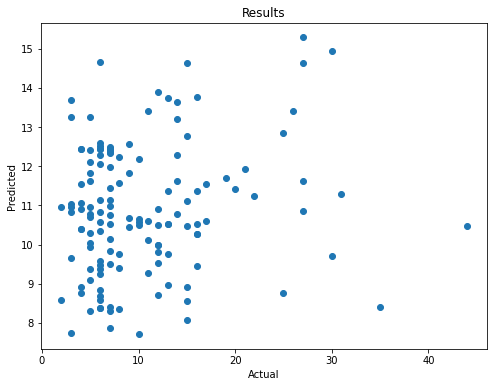

In [ ]:
# membandingkan hasil prediksi dan nilai asli
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions)
plt.title("Results")
plt.xlabel("Actual")
plt.ylabel("Predicted")

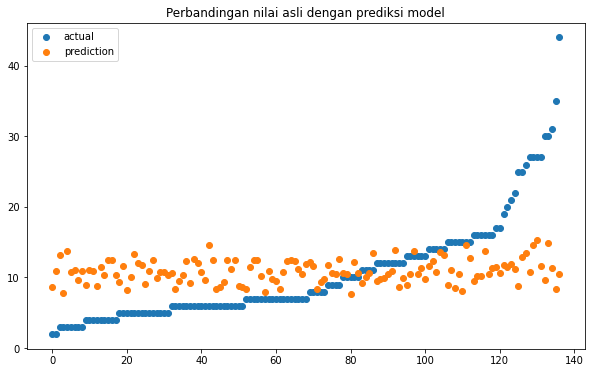

In [ ]:
import numpy as np
plt.figure(figsize=(10, 6))

# mengurutkan nilai asli dari terkecil hingga tertinggi
y_sorted = np.sort(y_test.tolist())
y_sorted_index = np.argsort(y_test.tolist())

# merubah urutan prediction score berdasarkan urutan y_sorted 
predictions_sorted = predictions[y_sorted_index]

# plot kedua score
plt.scatter(np.arange(0,len(y_sorted)), y_sorted, label='actual')
plt.scatter(np.arange(0,len(y_sorted)), predictions_sorted, label='prediction')
plt.title("Perbandingan nilai asli dengan prediksi model")
plt.legend()

In [ ]:
# mengevaluasi model dengan 3 metrik berbeda
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 5.561324821401743
MSE: 54.076190556013835
RMSE: 7.353651511733054


### **Model 5**: Mood Builder 1.0

1. **Independent variables (X) :** 'danceability', 'energy', 'valence', 'tempo'
2. **Dependent variable (Y) :** 'popularity'

#### a. Model Building

In [ ]:
# memilih kolom untuk digunakan sebagai fitur model -- menghilangkan target variabel dan kolom tidak penting lainnya
x = features_df.drop(columns=['length', 'popularity', 'acousticness', 'instrumentalness', 'liveness',
                  'loudness', 'mode', 'key', 'speechiness'])
# memilih kolom untuk digunakan sebagai variabel target
y = features_df['popularity']

# membagi data ke training dan testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

print("X_train : ", x_train.shape)
print("X_test : ", x_test.shape)
print("Y_train : ", y_train.shape)
print("Y_test : ", y_test.shape)

X_train :  (545, 4)
X_test :  (137, 4)
Y_train :  (545,)
Y_test :  (137,)


In [ ]:
# membuat model linear regression
linear_regression_model = LinearRegression()
# "training" model dengan dataset yang sesuai
linear_regression_model.fit(x_train,y_train)

LinearRegression()

In [ ]:
# mengambil koefisien yang didapatkan dari model
linear_regression_model.coef_

array([-3.94018966,  1.79089982, -2.45656375,  0.02887699])

In [ ]:
# menampilkan hasil linear regression (koefisien dari model)
coeff_df = pd.DataFrame(linear_regression_model.coef_, x.columns, columns = ["Coefficient"])
coeff_df

,Coefficient
danceability,-3.940190
energy,1.790900
valence,-2.456564
tempo,0.028877


In [ ]:
# mengambil bias dari model
linear_regression_model.intercept_

9.100074566910669

#### b. Model Evaluation

In [ ]:
# menggunakan model untuk memprediksi nilai matematika menggunakan testing dataset
predictions = linear_regression_model.predict(x_test)

In [ ]:
df_test_set = x_test
df_test_set = df_test_set.join(y_test)
df_test_set['PREDICTED SCORE'] = predictions
df_test_set.head(5)

,danceability,energy,valence,tempo,popularity,PREDICTED SCORE
99,0.568,0.977,0.631,130.050,7,10.817117
673,0.456,0.561,0.438,77.999,26,9.484444
20,0.383,0.885,0.453,169.876,17,12.968613
473,0.485,0.843,0.662,161.993,8,11.750436
651,0.645,0.635,0.712,163.100,4,10.656637


Text(0, 0.5, 'Predicted')

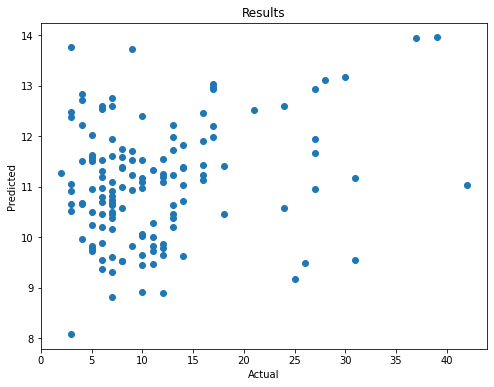

In [ ]:
# membandingkan hasil prediksi dan nilai asli
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions)
plt.title("Results")
plt.xlabel("Actual")
plt.ylabel("Predicted")

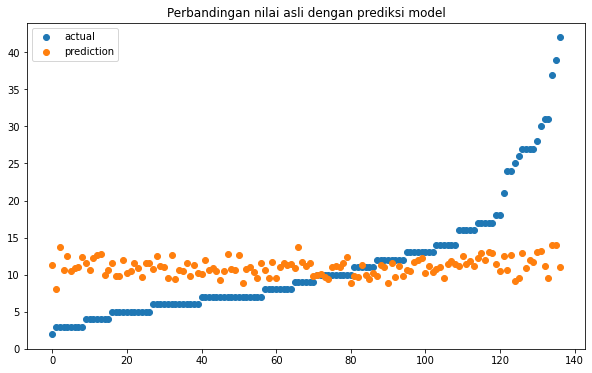

In [ ]:
import numpy as np
plt.figure(figsize=(10, 6))

# mengurutkan nilai asli dari terkecil hingga tertinggi
y_sorted = np.sort(y_test.tolist())
y_sorted_index = np.argsort(y_test.tolist())

# merubah urutan prediction score berdasarkan urutan y_sorted 
predictions_sorted = predictions[y_sorted_index]

# plot kedua score
plt.scatter(np.arange(0,len(y_sorted)), y_sorted, label='actual')
plt.scatter(np.arange(0,len(y_sorted)), predictions_sorted, label='prediction')
plt.title("Perbandingan nilai asli dengan prediksi model")
plt.legend()

In [ ]:
# mengevaluasi model dengan 3 metrik berbeda
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 5.503231604545721
MSE: 57.3342009941398
RMSE: 7.571935089139354


### **Model 6**: Mood Builder 2.0

1. **Independent variables (X) :** 'danceability', 'energy', 'valence', 'tempo', 'key'
2. **Dependent variable (Y) :** 'popularity'

#### a. Model Building

In [ ]:
# memilih kolom untuk digunakan sebagai fitur model -- menghilangkan target variabel dan kolom tidak penting lainnya
x = features_df.drop(columns=['length', 'popularity', 'acousticness', 'instrumentalness', 'liveness',
                  'loudness', 'mode', 'speechiness'])
# memilih kolom untuk digunakan sebagai variabel target
y = features_df['popularity']

# membagi data ke training dan testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

print("X_train : ", x_train.shape)
print("X_test : ", x_test.shape)
print("Y_train : ", y_train.shape)
print("Y_test : ", y_test.shape)

X_train :  (545, 5)
X_test :  (137, 5)
Y_train :  (545,)
Y_test :  (137,)


In [ ]:
# membuat model linear regression
linear_regression_model = LinearRegression()
# "training" model dengan dataset yang sesuai
linear_regression_model.fit(x_train,y_train)

LinearRegression()

In [ ]:
# mengambil koefisien yang didapatkan dari model
linear_regression_model.coef_

array([-6.80189995,  5.48720032, -3.59719678,  0.12518243,  0.02479427])

In [ ]:
# menampilkan hasil linear regression (koefisien dari model)
coeff_df = pd.DataFrame(linear_regression_model.coef_, x.columns, columns = ["Coefficient"])
coeff_df

,Coefficient
danceability,-6.801900
energy,5.487200
valence,-3.597197
key,0.125182
tempo,0.024794


In [ ]:
# mengambil bias dari model
linear_regression_model.intercept_

8.128016266549306

#### b. Model Evaluation

In [ ]:
# menggunakan model untuk memprediksi nilai matematika menggunakan testing dataset
predictions = linear_regression_model.predict(x_test)

In [ ]:
df_test_set = x_test
df_test_set = df_test_set.join(y_test)
df_test_set['PREDICTED SCORE'] = predictions
df_test_set.head(5)

,danceability,energy,valence,key,tempo,popularity,PREDICTED SCORE
183,0.392,0.994,0.148,4,123.557,6,13.947799
255,0.429,0.411,0.673,9,174.977,9,10.509396
49,0.644,0.963,0.792,10,134.022,22,10.757589
435,0.387,0.981,0.553,3,175.065,17,13.605531
557,0.675,0.839,0.949,7,110.004,4,8.330501


Text(0, 0.5, 'Predicted')

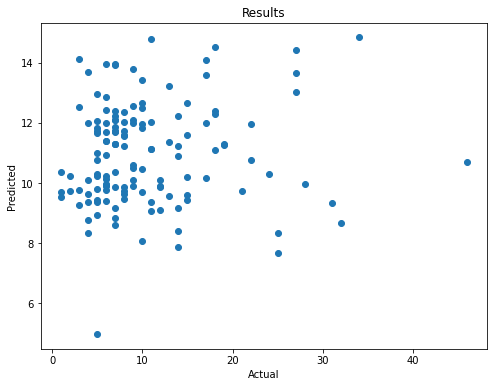

In [ ]:
# membandingkan hasil prediksi dan nilai asli
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions)
plt.title("Results")
plt.xlabel("Actual")
plt.ylabel("Predicted")

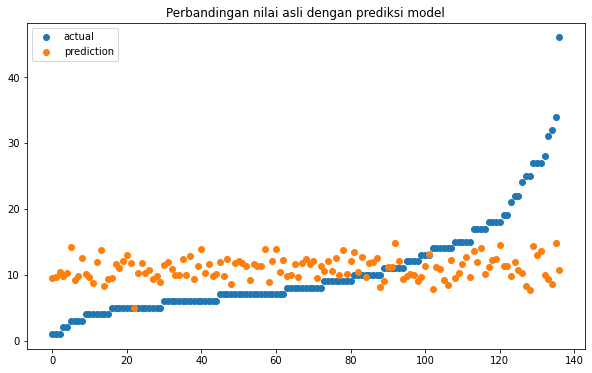

In [ ]:
import numpy as np
plt.figure(figsize=(10, 6))

# mengurutkan nilai asli dari terkecil hingga tertinggi
y_sorted = np.sort(y_test.tolist())
y_sorted_index = np.argsort(y_test.tolist())

# merubah urutan prediction score berdasarkan urutan y_sorted 
predictions_sorted = predictions[y_sorted_index]

# plot kedua score
plt.scatter(np.arange(0,len(y_sorted)), y_sorted, label='actual')
plt.scatter(np.arange(0,len(y_sorted)), predictions_sorted, label='prediction')
plt.title("Perbandingan nilai asli dengan prediksi model")
plt.legend()

In [ ]:
# mengevaluasi model dengan 3 metrik berbeda
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 5.6559027093967
MSE: 55.50726964797714
RMSE: 7.450320103725553


### **Model 7**: Mood Builder 3.0

1. **Independent variables (X) :** 'danceability', 'energy', 'valence', 'tempo', 'loudness'
2. **Dependent variable (Y) :** 'popularity'

#### a. Model Building

In [ ]:
# memilih kolom untuk digunakan sebagai fitur model -- menghilangkan target variabel dan kolom tidak penting lainnya
x = features_df.drop(columns=['length', 'popularity', 'acousticness', 'instrumentalness', 'liveness',
                   'mode', 'key', 'speechiness'])
# memilih kolom untuk digunakan sebagai variabel target
y = features_df['popularity']

# membagi data ke training dan testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

print("X_train : ", x_train.shape)
print("X_test : ", x_test.shape)
print("Y_train : ", y_train.shape)
print("Y_test : ", y_test.shape)

X_train :  (545, 5)
X_test :  (137, 5)
Y_train :  (545,)
Y_test :  (137,)


In [ ]:
# membuat model linear regression
linear_regression_model = LinearRegression()
# "training" model dengan dataset yang sesuai
linear_regression_model.fit(x_train,y_train)

LinearRegression()

In [ ]:
# mengambil koefisien yang didapatkan dari model
linear_regression_model.coef_

array([-6.54142364, 11.49570872, -1.32276477, -3.04251792,  0.02547711])

In [ ]:
# menampilkan hasil linear regression (koefisien dari model)
coeff_df = pd.DataFrame(linear_regression_model.coef_, x.columns, columns = ["Coefficient"])
coeff_df

,Coefficient
danceability,-6.541424
energy,11.495709
loudness,-1.322765
valence,-3.042518
tempo,0.025477


In [ ]:
# mengambil bias dari model
linear_regression_model.intercept_

-2.0294250857468263

#### b. Model Evaluation

In [ ]:
# menggunakan model untuk memprediksi nilai matematika menggunakan testing dataset
predictions = linear_regression_model.predict(x_test)

In [ ]:
df_test_set = x_test
df_test_set = df_test_set.join(y_test)
df_test_set['PREDICTED SCORE'] = predictions
df_test_set.head(5)

,danceability,energy,loudness,valence,tempo,popularity,PREDICTED SCORE
471,0.593,0.880,-3.949,0.690,129.970,15,10.643255
407,0.425,0.905,-3.805,0.770,206.125,9,13.535937
112,0.533,0.827,-4.989,0.546,131.002,7,12.266559
485,0.346,0.887,-3.409,0.219,168.065,18,14.028741
39,0.490,0.971,-6.525,0.558,117.948,9,15.865900


Text(0, 0.5, 'Predicted')

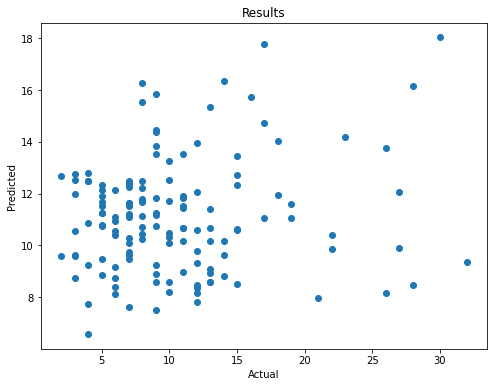

In [ ]:
# membandingkan hasil prediksi dan nilai asli
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions)
plt.title("Results")
plt.xlabel("Actual")
plt.ylabel("Predicted")

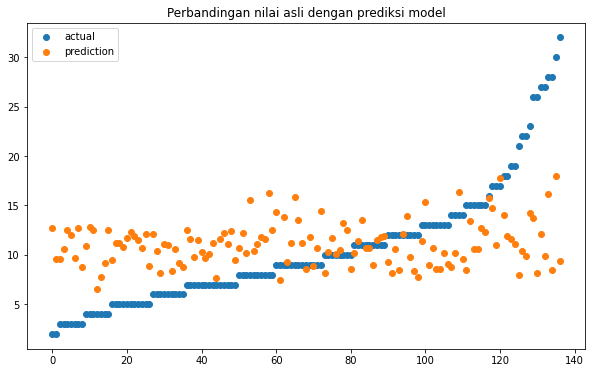

In [ ]:
import numpy as np
plt.figure(figsize=(10, 6))

# mengurutkan nilai asli dari terkecil hingga tertinggi
y_sorted = np.sort(y_test.tolist())
y_sorted_index = np.argsort(y_test.tolist())

# merubah urutan prediction score berdasarkan urutan y_sorted 
predictions_sorted = predictions[y_sorted_index]

# plot kedua score
plt.scatter(np.arange(0,len(y_sorted)), y_sorted, label='actual')
plt.scatter(np.arange(0,len(y_sorted)), predictions_sorted, label='prediction')
plt.title("Perbandingan nilai asli dengan prediksi model")
plt.legend()

In [ ]:
# mengevaluasi model dengan 3 metrik berbeda
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 4.885135147054036
MSE: 39.39183052992884
RMSE: 6.276291144452179


### **Model 8**: Mood Builder 4.0

1. **Independent variables (X) :** 'danceability', 'energy', 'valence', 'tempo', 'key', 'loudness'
2. **Dependent variable (Y) :** 'popularity'

#### a. Model Building

In [ ]:
# memilih kolom untuk digunakan sebagai fitur model -- menghilangkan target variabel dan kolom tidak penting lainnya
x = features_df.drop(columns=['length', 'popularity', 'acousticness', 'instrumentalness', 'liveness',
                  'mode', 'speechiness'])
# memilih kolom untuk digunakan sebagai variabel target
y = features_df['popularity']

# membagi data ke training dan testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

print("X_train : ", x_train.shape)
print("X_test : ", x_test.shape)
print("Y_train : ", y_train.shape)
print("Y_test : ", y_test.shape)

X_train :  (545, 6)
X_test :  (137, 6)
Y_train :  (545,)
Y_test :  (137,)


In [ ]:
# membuat model linear regression
linear_regression_model = LinearRegression()
# "training" model dengan dataset yang sesuai
linear_regression_model.fit(x_train,y_train)

LinearRegression()

In [ ]:
# mengambil koefisien yang didapatkan dari model
linear_regression_model.coef_

array([-6.3874438 , 10.2949264 , -1.10289581, -2.74565889,  0.30512805,
        0.02567088])

In [ ]:
# menampilkan hasil linear regression (koefisien dari model)
coeff_df = pd.DataFrame(linear_regression_model.coef_, x.columns, columns = ["Coefficient"])
coeff_df

,Coefficient
danceability,-6.387444
energy,10.294926
loudness,-1.102896
valence,-2.745659
key,0.305128
tempo,0.025671


In [ ]:
# mengambil bias dari model
linear_regression_model.intercept_

-2.2261058468092596

#### b. Model Evaluation

In [ ]:
# menggunakan model untuk memprediksi nilai matematika menggunakan testing dataset
predictions = linear_regression_model.predict(x_test)

In [ ]:
df_test_set = x_test
df_test_set = df_test_set.join(y_test)
df_test_set['PREDICTED SCORE'] = predictions
df_test_set.head(5)

,danceability,energy,loudness,valence,key,tempo,popularity,PREDICTED SCORE
463,0.414,0.899,-3.882,0.657,7,168.034,16,13.311652
611,0.546,0.931,-2.226,0.747,11,96.012,6,10.096086
172,0.570,0.772,-4.041,0.633,5,102.011,5,8.943887
312,0.589,0.907,-2.126,0.533,7,140.017,30,9.960764
488,0.442,0.974,-3.031,0.645,4,183.997,13,12.493707


Text(0, 0.5, 'Predicted')

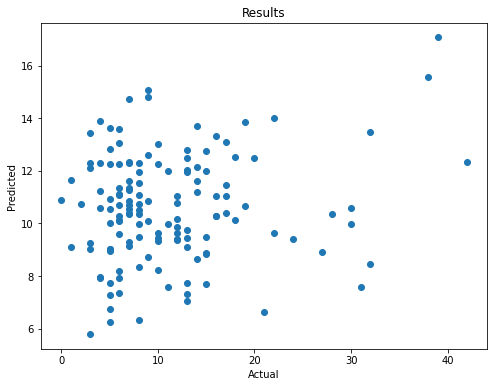

In [ ]:
# membandingkan hasil prediksi dan nilai asli
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions)
plt.title("Results")
plt.xlabel("Actual")
plt.ylabel("Predicted")

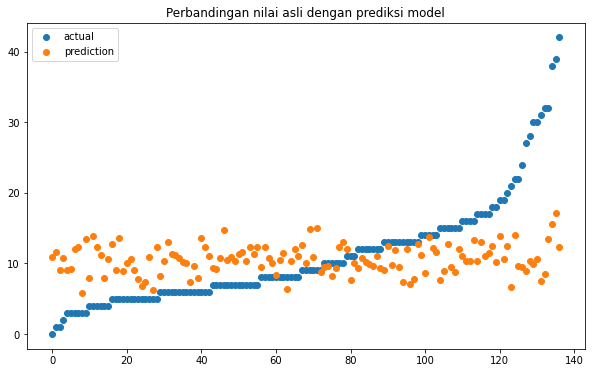

In [ ]:
import numpy as np
plt.figure(figsize=(10, 6))

# mengurutkan nilai asli dari terkecil hingga tertinggi
y_sorted = np.sort(y_test.tolist())
y_sorted_index = np.argsort(y_test.tolist())

# merubah urutan prediction score berdasarkan urutan y_sorted 
predictions_sorted = predictions[y_sorted_index]

# plot kedua score
plt.scatter(np.arange(0,len(y_sorted)), y_sorted, label='actual')
plt.scatter(np.arange(0,len(y_sorted)), predictions_sorted, label='prediction')
plt.title("Perbandingan nilai asli dengan prediksi model")
plt.legend()

In [ ]:
# mengevaluasi model dengan 3 metrik berbeda
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 5.7399194199794445
MSE: 61.06960011801773
RMSE: 7.814704096638447
